# Punto 2 de la actividad 1 de estadistica 2

In [92]:
import numpy as np
import pandas as pd
import plotly
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from matplotlib import style
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro
%matplotlib inline

In [5]:
df = pd.read_csv('./CARS.csv')
df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225,18,24,3880,115,197


### 2.1.1. Para las variables categóricas un gráfico de barras. Categoría numero de observaciones.

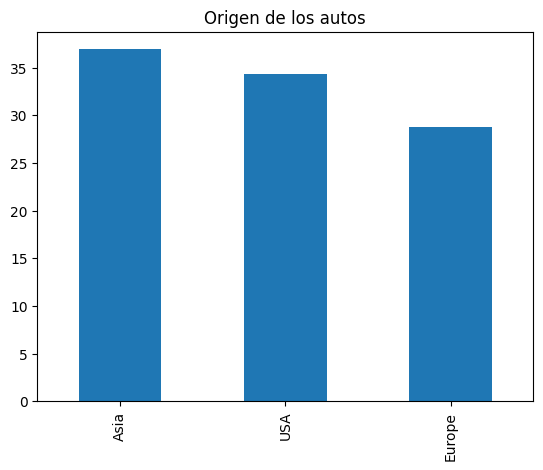

In [31]:
plot = (100 * df['Origin'].value_counts() / len(df['Origin'])).plot(
kind='bar', title='Origen de los autos')

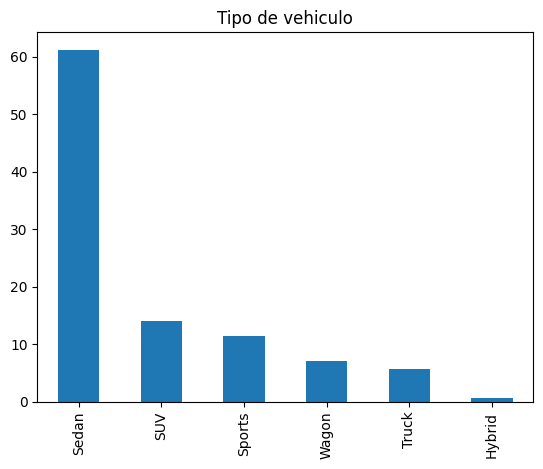

In [33]:
plot = (100 * df['Type'].value_counts() / len(df['Type'])).plot(
kind='bar', title='Tipo de vehiculo')

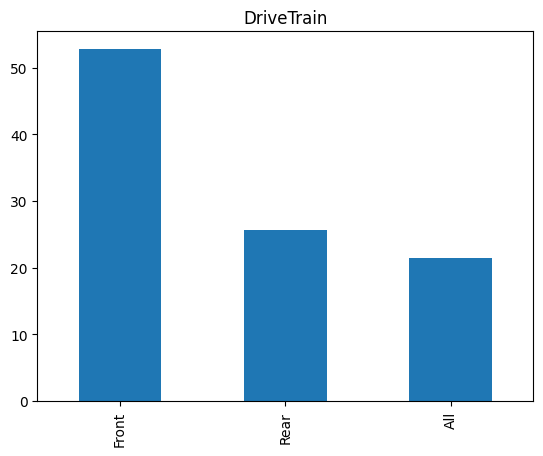

In [36]:
plot = (100 * df['DriveTrain'].value_counts() / len(df['DriveTrain'])).plot(
kind='bar', title='DriveTrain')

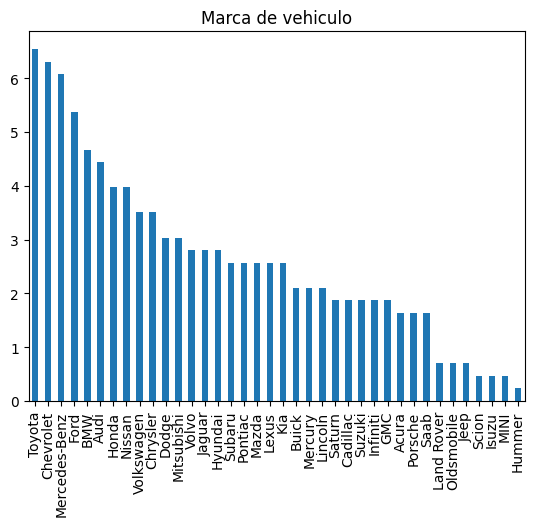

In [38]:

plot = (100 * df['Make'].value_counts() / len(df['Make'])).plot(
kind='bar', title='Marca de vehiculo')

### 2.1.2. Para las variables numéricas crear histogramas. Listar los modelos de carros que están más lejos de 4 estándares de desviación, y serían considerados outliers. Hacer test de si es una distribución normal o no.

<Axes: xlabel='EngineSize', ylabel='Count'>

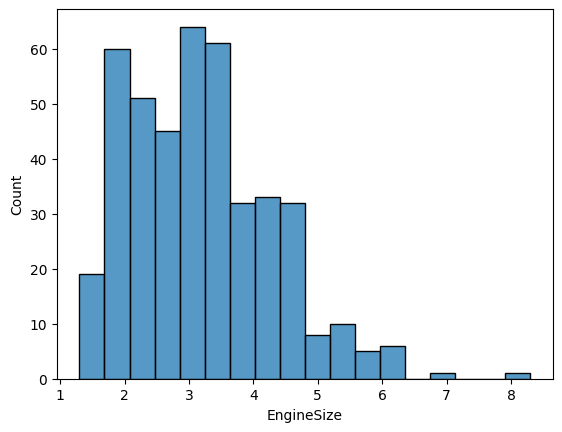

In [44]:
sns.histplot(data=df, x='EngineSize')

<Axes: xlabel='Cylinders', ylabel='Count'>

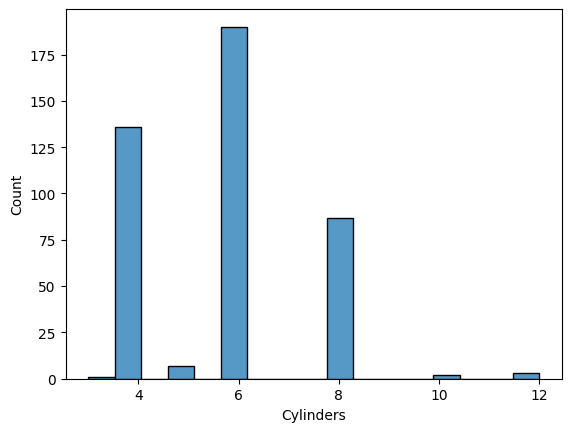

In [45]:
sns.histplot(data=df, x='Cylinders')

<Axes: xlabel='Horsepower', ylabel='Count'>

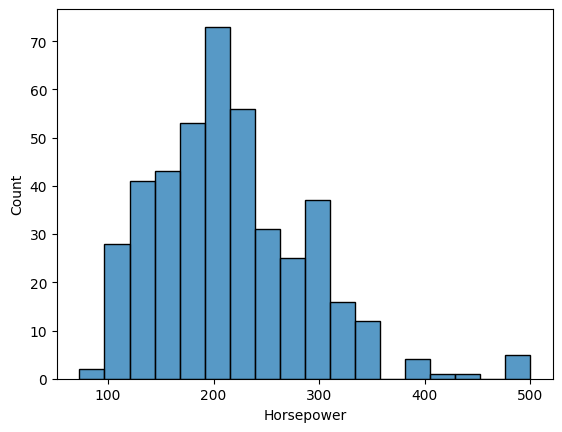

In [46]:
sns.histplot(data=df, x='Horsepower')

<Axes: xlabel='MPG_City', ylabel='Count'>

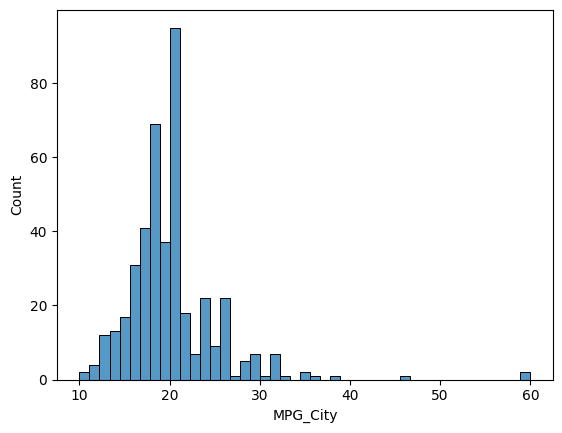

In [47]:

sns.histplot(data=df, x='MPG_City')

<Axes: xlabel='MPG_Highway', ylabel='Count'>

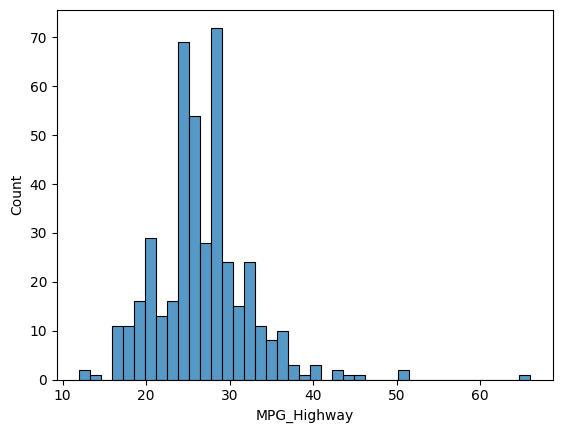

In [48]:
sns.histplot(data=df, x='MPG_Highway')

<Axes: xlabel='Weight', ylabel='Count'>

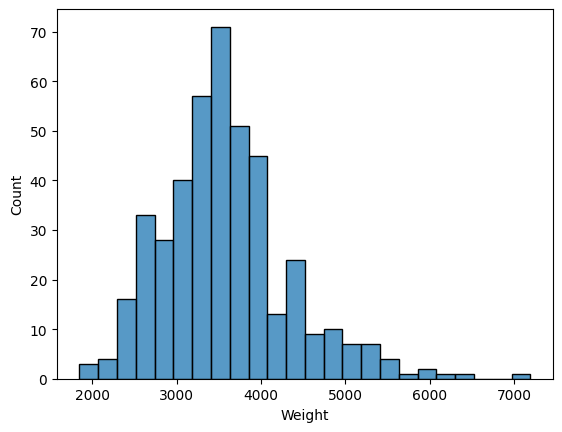

In [49]:
sns.histplot(data=df, x='Weight')

<Axes: xlabel='Wheelbase', ylabel='Count'>

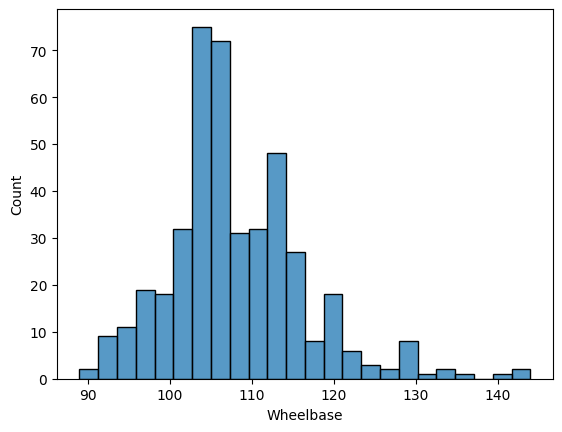

In [50]:

sns.histplot(data=df, x='Wheelbase')

<Axes: xlabel='Length', ylabel='Count'>

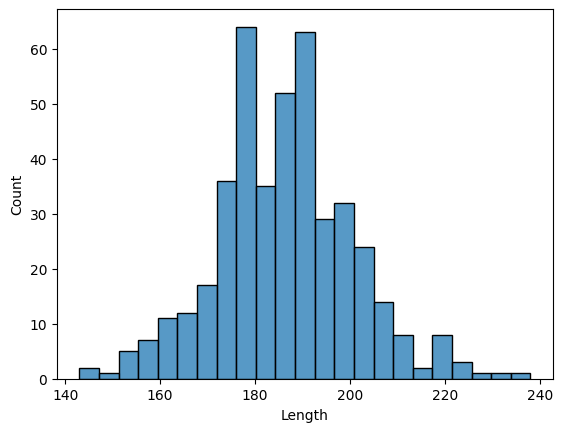

In [51]:
sns.histplot(data=df, x='Length')

### Listar los modelos de carros que están más lejos de 4 estándares de desviación

In [76]:
df.mean()+ 4*df.std()

C:\Users\jmora\AppData\Local\Temp\ipykernel_23624\2346106156.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()+ 4*df.std()
C:\Users\jmora\AppData\Local\Temp\ipykernel_23624\2346106156.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()+ 4*df.std()


EngineSize        7.631108
Cylinders        12.041282
Horsepower      503.229640
MPG_City         41.013618
MPG_Highway      49.808261
Weight         6613.886129
Wheelbase       141.401458
Length          243.794115
dtype: float64

In [81]:
df.mean()-(4*df.std())

C:\Users\jmora\AppData\Local\Temp\ipykernel_23624\1054109402.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()-(4*df.std())
C:\Users\jmora\AppData\Local\Temp\ipykernel_23624\1054109402.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()-(4*df.std())


EngineSize      -1.237650
Cylinders       -0.426259
Horsepower     -71.458612
MPG_City        -0.892123
MPG_Highway      3.878655
Weight         542.020413
Wheelbase       74.906954
Length         128.930185
dtype: float64

In [84]:
df.query('(EngineSize>7.631108 or EngineSize<-1.237650) ')



,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
114,Dodge,Viper SRT-10 convertible 2dr,Sports,USA,Rear,"$81,795","$74,451",8.3,10.0,500,12,20,3410,99,176


In [87]:
df.query('(MPG_City>41.013618 or MPG_City<-0.892123) ')

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
149,Honda,Civic Hybrid 4dr manual (gas/electric),Hybrid,Asia,Front,"$20,140","$18,451",1.4,4.0,93,46,51,2732,103,175
150,Honda,Insight 2dr (gas/electric),Hybrid,Asia,Front,"$19,110","$17,911",2.0,3.0,73,60,66,1850,95,155
373,Toyota,Prius 4dr (gas/electric),Hybrid,Asia,Front,"$20,510","$18,926",1.5,4.0,110,59,51,2890,106,175


In [88]:
df.query('(MPG_Highway>49.808261 or MPG_Highway<3.878655) ')

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
149,Honda,Civic Hybrid 4dr manual (gas/electric),Hybrid,Asia,Front,"$20,140","$18,451",1.4,4.0,93,46,51,2732,103,175
150,Honda,Insight 2dr (gas/electric),Hybrid,Asia,Front,"$19,110","$17,911",2.0,3.0,73,60,66,1850,95,155
373,Toyota,Prius 4dr (gas/electric),Hybrid,Asia,Front,"$20,510","$18,926",1.5,4.0,110,59,51,2890,106,175


In [89]:
df.query('(Weight>6613.886129 or Weight<542.020413) ')

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
118,Ford,Excursion 6.8 XLT,SUV,USA,All,"$41,475","$36,494",6.8,10.0,310,10,13,7190,137,227


In [90]:

df.query('(Wheelbase>141.401458 or Wheelbase<74.906954) ')

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
87,Chevrolet,Silverado SS,Truck,USA,All,"$40,340","$35,399",6.0,8.0,300,13,17,4804,144,238
146,GMC,Sierra Extended Cab 1500,Truck,USA,Rear,"$25,717","$22,604",4.8,8.0,285,17,20,4548,144,230


### Hacer test de si es una distribución normal o no.

In [95]:
stats.shapiro(df.describe())

ShapiroResult(statistic=0.431155800819397, pvalue=2.4218418543937685e-14)